In [3]:
import os
from google.colab import drive

def check_and_unmount_drive():
    # Check if the drive is already mounted
    if os.path.exists('/content/drive') and os.listdir('/content/drive'):
        print("Drive is mounted and contains files. Unmounting the drive...")
        drive.flush_and_unmount()
        print("Drive unmounted successfully.")
    else:
        print("Drive is not mounted or is already empty.")

# Call the function to check and unmount the drive
check_and_unmount_drive()


Drive is not mounted or is already empty.


In [4]:
import os
from google.colab import drive

def check_and_mount_drive():
    # Check if the drive is already mounted
    if os.path.exists('/content/drive') and os.listdir('/content/drive'):
        print("Drive is already mounted and contains files.")
        return

    # If not mounted or empty, mount the drive
    print("Mounting Google Drive...")
    drive.mount('/content/drive')

    # Check again if the mount was successful and the drive has content
    if os.path.exists('/content/drive') and os.listdir('/content/drive'):
        print("Drive mounted successfully and contains files.")
    else:
        print("Drive mounted, but it appears to be empty. Please check your Google Drive.")

# Call the function to check and mount the drive
check_and_mount_drive()

Mounting Google Drive...
Mounted at /content/drive
Drive mounted successfully and contains files.


In [5]:
!pip install mesa
!pip install gym
!pip install torch
!pip install torchsummary
import pickle
!pip install munkres
import gym
from gym import spaces
import numpy as np
import random
import itertools
import mesa
from mesa import Agent, Model
from mesa.time import SimultaneousActivation
from mesa.space import ContinuousSpace
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque, defaultdict
from itertools import count
from google.colab import files
from munkres import Munkres
import logging
logging.basicConfig(level=logging.INFO)
import json
import os

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 kB 3.8 MB/s eta 0:00:00
Could not import SolaraViz. If you need it, install with 'pip install --pre mesa[viz]'


In [6]:
file_path = "/content/drive/My Drive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Data files/city_data_v4.0c.xlsx"
xls = pd.ExcelFile(file_path)  # Use file_path variable to open the excel file
print(xls.sheet_names)

# Read each sheet into a separate DataFrame
df_transportation = pd.read_excel(file_path, sheet_name="Transportation") # Use file_path variable to open the excel file
df_powerplant = pd.read_excel(file_path, sheet_name="Powerplant") # Use file_path variable to open the excel file
df_wastewater = pd.read_excel(file_path, sheet_name="Wastewater") # Use file_path variable to open the excel file
df_school = pd.read_excel(file_path, sheet_name="School") # Use file_path variable to open the excel file
df_hospital = pd.read_excel(file_path, sheet_name="Hospital") # Use file_path variable to open the excel file
df_residential = pd.read_excel(file_path, sheet_name="Residential") # Use file_path variable to open the excel file
df_business = pd.read_excel(file_path, sheet_name="Business") # Use file_path variable to open the excel file
df_industrial= pd.read_excel(file_path, sheet_name="Industrial") # Use file_path variable to open the excel file
df_firestation= pd.read_excel(file_path, sheet_name="Firestation") # Use file_path variable to open the excel file

# Strip column names for each DataFrame
df_transportation.columns = df_transportation.columns.str.strip()
df_powerplant.columns = df_powerplant.columns.str.strip()
df_wastewater.columns = df_wastewater.columns.str.strip()
df_school.columns = df_school.columns.str.strip()
df_hospital.columns = df_hospital.columns.str.strip()
df_residential.columns = df_residential.columns.str.strip()
df_business.columns = df_business.columns.str.strip()
df_industrial.columns = df_industrial.columns.str.strip()
df_firestation.columns = df_firestation.columns.str.strip()


print(df_transportation.columns)
print(df_powerplant.columns)
print(df_wastewater.columns)
print(df_school.columns)
print(df_hospital.columns)
print(df_residential.columns)
print(df_business.columns)
print(df_industrial.columns)
print(df_firestation.columns)

# Extract coordinates and functionalities for Transportation
coords_Transportation = list(zip(df_transportation['x'], df_transportation['y']))
functionalities_Transportation = df_transportation['Func'].tolist()
id_Transportation = df_transportation['ID'].tolist()

# Extract coordinates and functionalities for Powerplant
coords_Powerplant = list(zip(df_powerplant['x'], df_powerplant['y']))
functionalities_Powerplant = df_powerplant['Func'].tolist()
id_Powerplant = df_powerplant['ID'].tolist()

# Extract coordinates and functionalities for Wastewater
coords_Waterplant = list(zip(df_wastewater['x'], df_wastewater['y']))
functionalities_Waterplant = df_wastewater['Func'].tolist()
id_Waterplant = df_wastewater['ID'].tolist()

# Extract coordinates and functionalities for school
coords_School = list(zip(df_school['x'], df_school['y']))
functionalities_School = df_school['Func'].tolist()
id_School = df_school['ID'].tolist()

# Extract coordinates and functionalities for Hospital
coords_Hospital = list(zip(df_hospital['x'], df_hospital['y']))
functionalities_Hospital = df_hospital['Func'].tolist()
id_Hospital = df_hospital['ID'].tolist()

# Extract coordinates and functionalities for residential
coords_Residential = list(zip(df_residential['x'], df_residential['y']))
functionalities_Residential = df_residential['Func'].tolist()
id_Residential = df_residential['ID'].tolist()

# Extract coordinates and functionalities for Business
coords_Business = list(zip(df_business['x'], df_business['y']))
functionalities_Business = df_business['Func'].tolist()
id_Business = df_business['ID'].tolist()

# Extract coordinates and functionalities for Industrial
coords_Industrial = list(zip(df_industrial['x'], df_industrial['y']))
functionalities_Industrial = df_industrial['Func'].tolist()
id_Industrial = df_industrial['ID'].tolist()

#Extract coordinates and functionalities for Firestation
coords_Firestation = list(zip(df_firestation['x'], df_firestation['y']))
functionalities_Firestation = df_firestation['Func'].tolist()
id_Firestation = df_firestation['ID'].tolist()

# Print extracted coordinates and functionalities for all
print("Coordinates for Transportation:", coords_Transportation)
print("Coordinates for Powerplant:", coords_Powerplant)
print("Coordinates for Wastewater:", coords_Waterplant)
print("Coordinates for School:", coords_School)
print("Coordinates for Hospital:", coords_Hospital)
print("Coordinates for Residential:", coords_Residential)
print("Coordinates for Business:", coords_Business)
print("Coordinates for Industrial:", coords_Industrial)
print("Coordinates for Firestation:", coords_Firestation)
print("Functionalities for Transportation:", functionalities_Transportation)
print("Functionalities for Powerplant:", functionalities_Powerplant)
print("Functionalities for Wastewater:", functionalities_Waterplant)
print("Functionalities for School:", functionalities_School)
print("Functionalities for Hospital:", functionalities_Hospital)
print("Functionalities for Residential:", functionalities_Residential)
print("Functionalities for Business:", functionalities_Business)
print("Functionalities for Industrial:", functionalities_Industrial)
print("Functionalities for Firestation:", functionalities_Firestation)
print("ID's for Transportation:", id_Transportation)
print("ID's for Powerplant:", id_Powerplant)
print("ID's for Wastewater:", id_Waterplant)
print("ID's for School:", id_School)
print("ID's for Hospital:", id_Hospital)
print("ID's for Residential:", id_Residential)
print("ID's for Business:", id_Business)
print("ID's for Industrial:", id_Industrial)
print("ID's for Firestation:", id_Firestation)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Powerplant', 'Wastewater', 'School', 'Hospital', 'Business', 'Industrial', 'Residential', 'Firestation', 'Transportation', 'Summary']
Index(['ID', 'x', 'y', 'Func', 'type', 'size'], dtype='object')
Index(['ID', 'x', 'y', 'Func', 'type', 'size'], dtype='object')
Index(['ID', 'x', 'y', 'Func', 'type', 'size'], dtype='object')
Index(['ID', 'x', 'y', 'Func', 'type', 'size'], dtype='object')
Index(['ID', 'x', 'y', 'Func', 'type', 'size'], dtype='object')
Index(['ID', 'x', 'y', 'Func', 'type', 'size'], dtype='object')
Index(['ID', 'x', 'y', 'Func', 'type', 'size'], dtype='object')
Index(['ID', 'x', 'y', 'Func', 'type', 'size'], dtype='object')
Index(['ID', 'x', 'y', 'Func', 'type', 'size'], dtype='object')
Coordinates for Transportation: [(-2.498612078306438, -1.947129740423844), (-2.498612078306438, -1.897129740423844), (-2.498612078306438, -1.847129740423844), (-2.498612078306438, -1.797129740423844), (-2.498612078306438, -1.747129740423844), (-2.498612078306438, -1.697129740423844), (-2

In [7]:
depend_distance = 2 #2 for large map
max_steps = 22
num_crews = 3
total_budget = 10000 #Limited budget


In [8]:
damaged_facilities = [1, 2, 3, 4, 17, 44, 909, 911, 1412, 1859] #by ID
print(damaged_facilities)


[1, 2, 3, 4, 17, 44, 909, 911, 1412, 1859]


In [9]:
# This code verifies the damaged facilities by matching the ID and the functionality

def verify_damaged_facilities(damaged_facilities):
    """
    Verifies damaged facilities by matching IDs to functionalities.

    Args:
        damaged_facilities: A list of facility IDs.
    """

    facility_data = {
        "Transportation": (id_Transportation, functionalities_Transportation),
        "Powerplant": (id_Powerplant, functionalities_Powerplant),
        "Wastewater": (id_Waterplant, functionalities_Waterplant),
        "School": (id_School, functionalities_School),
        "Hospital": (id_Hospital, functionalities_Hospital),
        "Residential": (id_Residential, functionalities_Residential),
        "Business": (id_Business, functionalities_Business),
        "Industrial": (id_Industrial, functionalities_Industrial),
        "Firestation": (id_Firestation, functionalities_Firestation),
    }

    for facility_id in damaged_facilities:
        found = False
        for facility_type, (ids, functionalities) in facility_data.items():
            try:
                index = ids.index(facility_id)
                print(f"Facility ID: {facility_id}, Type: {facility_type}, Functionality: {functionalities[index]}")
                found = True
                break
            except ValueError:
                pass
        if not found:
            print(f"Facility ID: {facility_id} not found in any facility list.")

verify_damaged_facilities(damaged_facilities)

Facility ID: 1, Type: Powerplant, Functionality: 0.2420949066222317
Facility ID: 2, Type: Powerplant, Functionality: 0.01198220256129395
Facility ID: 3, Type: Wastewater, Functionality: 0
Facility ID: 4, Type: Wastewater, Functionality: 0
Facility ID: 17, Type: School, Functionality: 0.02307292325895138
Facility ID: 44, Type: Business, Functionality: 0.5410907944599783
Facility ID: 909, Type: Residential, Functionality: 0.826756204509311
Facility ID: 911, Type: Residential, Functionality: 0.0
Facility ID: 1412, Type: Residential, Functionality: 0.3964270819433532
Facility ID: 1859, Type: Residential, Functionality: 0.3989335208628594


In [10]:
# Define dependency coefficients
dependency_coefficients = {
    'transportation': {
        'transportation': 0.7,
        'power_plants': 0.5,
        'wastewater': 0.5,
        'schools': 0.6,
        'hospitals': 0.6,
        'residential': 0.4,
        'businesses': 0.4,
        'industrial': 0.4
    },
    'power_plants': {
        'transportation': 0.4,
        'power_plants': 0.5,
        'wastewater': 0.6,
        'schools': 0.6,
        'hospitals': 0.8,
        'residential': 0.7,
        'businesses': 0.7,
        'industrial': 0.8
    },
    'wastewater': {
        'transportation': 0.3,
        'power_plants': 0.4,
        'wastewater': 0.5,
        'schools': 0.6,
        'hospitals': 0.7,
        'residential': 0.8,
        'businesses': 0.6,
        'industrial': 0.7
    }
}

import math

class BaseAgent:
    def __init__(self, unique_id, model, facility_id): # Add __init__ method to BaseAgent
        self.unique_id = unique_id
        self.model = model
        self.facility_id = facility_id

    def get_dependency_coefficient(self, other_agent):
        """
        Get the dependency coefficient between two agents based on their types.

        Args:
            other_agent: The other agent to calculate the coefficient with.

        Returns:
            The dependency coefficient between the two agents.
        """
        # Get class names for dependency lookup
        self_type = self.__class__.__name__.lower().replace('agent', '')
        other_type = other_agent.__class__.__name__.lower().replace('agent', '')

        # Handle special cases for dependency coefficient keys
        if self_type == 'waterplant':
            self_type = 'wastewater'
        if other_type == 'waterplant':
            other_type = 'wastewater'
        if self_type == "firestation":
            self_type = "residential"
        if other_type == "firestation":
            other_type = "residential"

        # Get dependency coefficient from the predefined dictionary
        # If not found, default to 1 (no dependency)
        for main_type, dependencies in dependency_coefficients.items():
            if self_type == main_type:
                coefficient = dependencies.get(other_type, 1)
                return coefficient
        return 1  # Default if not found in any category

    def repair_agent(self, facility_id, depend_distance):
        """
        Repair an agent and potentially its dependent neighbors.

        Args:
            facility_id: The ID of the agent to repair.
            depend_distance: The distance within which dependent agents are affected.
        """
        agent = self.model.schedule._agents[facility_id]  # Get the agent by ID

        # Calculate functionality change, capped at 0.1 or remaining damage
        functionality_change = min(0.1, 1 - agent.functionality)

        # Apply repair to the target agent
        agent.functionality += functionality_change
        agent.functionality = round(max(min(agent.functionality, 1), 0), 6) # Ensure functionality is within [0, 1]

        # Update dependent neighbors within the specified distance
        for other_agent in self.model.schedule.agents:
            if other_agent.unique_id != facility_id and other_agent.unique_id not in damaged_facilities:
                distance = self.model.space.get_distance(agent.pos, other_agent.pos)
                coefficient = self.get_dependency_coefficient(other_agent)

                if distance < depend_distance:
                    # Apply repair to the dependent agent
                    repair_amount = functionality_change * coefficient * math.exp(-distance / 100)
                    other_agent.functionality += repair_amount
                    other_agent.functionality = round(max(min(other_agent.functionality, 1), 0), 6)

class TransportationAgent(BaseAgent):
    def __init__(self, unique_id, model, facility_id, x, y, functionality):
        super().__init__(unique_id, model, facility_id)
        self.functionality = functionality
        self.pos = (x, y)

class PowerplantAgent(BaseAgent):
    def __init__(self, unique_id, model, facility_id, x, y, functionality):
        super().__init__(unique_id, model, facility_id)
        self.functionality = functionality
        self.pos = (x, y)

class WaterplantAgent(BaseAgent):
    def __init__(self, unique_id, model, facility_id, x, y, functionality):
        super().__init__(unique_id, model, facility_id)
        self.functionality = functionality
        self.pos = (x, y)

class SchoolAgent(BaseAgent):
    def __init__(self, unique_id, model, facility_id, x, y, functionality):
        super().__init__(unique_id, model, facility_id)
        self.functionality = functionality
        self.pos = (x, y)

class HospitalAgent(BaseAgent):
    def __init__(self, unique_id, model, facility_id, x, y, functionality):
        super().__init__(unique_id, model, facility_id)
        self.functionality = functionality
        self.pos = (x, y)

class ResidentialAgent(BaseAgent):
    def __init__(self, unique_id, model, facility_id, x, y, functionality):
        super().__init__(unique_id, model, facility_id)
        self.functionality = functionality
        self.pos = (x, y)

class BusinessAgent(BaseAgent):
    def __init__(self, unique_id, model, facility_id, x, y, functionality):
        super().__init__(unique_id, model, facility_id)
        self.functionality = functionality
        self.pos = (x, y)

class FirestationAgent(BaseAgent):
    def __init__(self, unique_id, model, facility_id, x, y, functionality):
        super().__init__(unique_id, model, facility_id)
        self.functionality = functionality
        self.pos = (x, y)

class IndustrialAgent(BaseAgent):
    def __init__(self, unique_id, model, facility_id, x, y, functionality):
        super().__init__(unique_id, model, facility_id)
        self.functionality = functionality
        self.pos = (x, y)

class InfrastructureModel(mesa.Model):
    def __init__(self, id_Transportation, id_Powerplant, id_Waterplant, id_School, id_Hospital, id_Residential, id_Business, id_Firestation, id_Industrial,
                 coords_Transportation, coords_Powerplant, coords_Waterplant, coords_School, coords_Hospital, coords_Residential, coords_Business, coords_Firestation, coords_Industrial,
                 functionalities_Transportation, functionalities_Powerplant, functionalities_Waterplant,
                 functionalities_School, functionalities_Hospital, functionalities_Residential,
                 functionalities_Business, functionalities_Industrial, functionalities_Firestation):

        super().__init__()

        # Store input parameters
        self.coords_Transportation = coords_Transportation
        self.coords_Powerplant = coords_Powerplant
        self.coords_Waterplant = coords_Waterplant
        self.coords_School = coords_School
        self.coords_Hospital = coords_Hospital
        self.coords_Residential = coords_Residential
        self.coords_Business = coords_Business
        self.coords_Firestation = coords_Firestation
        self.coords_Industrial = coords_Industrial

        self.functionalities_Transportation = functionalities_Transportation
        self.functionalities_Powerplant = functionalities_Powerplant
        self.functionalities_Waterplant = functionalities_Waterplant
        self.functionalities_School = functionalities_School
        self.functionalities_Hospital = functionalities_Hospital
        self.functionalities_Residential = functionalities_Residential
        self.functionalities_Business = functionalities_Business
        self.functionalities_Firestation = functionalities_Firestation
        self.functionalities_Industrial = functionalities_Industrial

        self.id_Transportation = id_Transportation
        self.id_Powerplant = id_Powerplant
        self.id_Waterplant = id_Waterplant
        self.id_School = id_School
        self.id_Hospital = id_Hospital
        self.id_Residential = id_Residential
        self.id_Business = id_Business
        self.id_Firestation = id_Firestation
        self.id_Industrial = id_Industrial

        # Calculate number of agents for each type
        self.num_Transportation = len(coords_Transportation)
        self.num_Powerplant = len(coords_Powerplant)
        self.num_Waterplant = len(coords_Waterplant)
        self.num_School = len(coords_School)
        self.num_Hospital = len(coords_Hospital)
        self.num_Residential = len(coords_Residential)
        self.num_Business = len(coords_Business)
        self.num_Firestation = len(coords_Firestation)
        self.num_Industrial = len(coords_Industrial)

        # Calculate total number of agents
        self.num_agents = (self.num_Transportation + self.num_Powerplant + self.num_Waterplant +
                         self.num_School + self.num_Hospital + self.num_Residential +
                         self.num_Business + self.num_Firestation + self.num_Industrial)

        # Initialize the scheduler
        self.schedule = mesa.time.SimultaneousActivation(self)

        # Flatten all coordinate lists into a single list
        all_coords = (coords_Transportation + coords_Powerplant + coords_Waterplant +
                     coords_School + coords_Hospital + coords_Residential +
                     coords_Business + coords_Firestation + coords_Industrial)

        # Find the minimum and maximum x and y coordinates
        min_x = min(coord[0] for coord in all_coords)
        max_x = max(coord[0] for coord in all_coords)
        min_y = min(coord[1] for coord in all_coords)
        max_y = max(coord[1] for coord in all_coords)

        # Calculate the width and height of the space
        width = max_x - min_x + 2000  # Add some padding
        height = max_y - min_y + 2000  # Add some padding

        # Initialize the continuous space with the calculated dimensions
        self.space = ContinuousSpace(width, height, False, min_x - 1000, min_y - 1000)

        # Helper function to place agents
        def place_agents(coords, functionalities, agent_class, facility_ids):
            for (x, y), facility_id, functionality in zip(coords, facility_ids, functionalities):
                agent = agent_class(facility_id, self, facility_id, x, y, functionality)
                self.schedule.add(agent)
                self.space.place_agent(agent, (x, y))

        # Place all agents using facility IDs directly
        place_agents(coords_Transportation, functionalities_Transportation, TransportationAgent, id_Transportation)
        place_agents(coords_Powerplant, functionalities_Powerplant, PowerplantAgent, id_Powerplant)
        place_agents(coords_Waterplant, functionalities_Waterplant, WaterplantAgent, id_Waterplant)
        place_agents(coords_School, functionalities_School, SchoolAgent, id_School)
        place_agents(coords_Hospital, functionalities_Hospital, HospitalAgent, id_Hospital)
        place_agents(coords_Residential, functionalities_Residential, ResidentialAgent, id_Residential)
        place_agents(coords_Business, functionalities_Business, BusinessAgent, id_Business)
        place_agents(coords_Firestation, functionalities_Firestation, FirestationAgent, id_Firestation)
        place_agents(coords_Industrial, functionalities_Industrial, IndustrialAgent, id_Industrial)


In [11]:
num_transportation = len(coords_Transportation)
num_powerplant = len(coords_Powerplant)
num_waterplant = len(coords_Waterplant)
num_school = len(coords_School)
num_hospital = len(coords_Hospital)
num_residential = len(coords_Residential)
num_business = len(coords_Business)
num_firestation = len(coords_Firestation)
num_industrial = len(coords_Industrial)

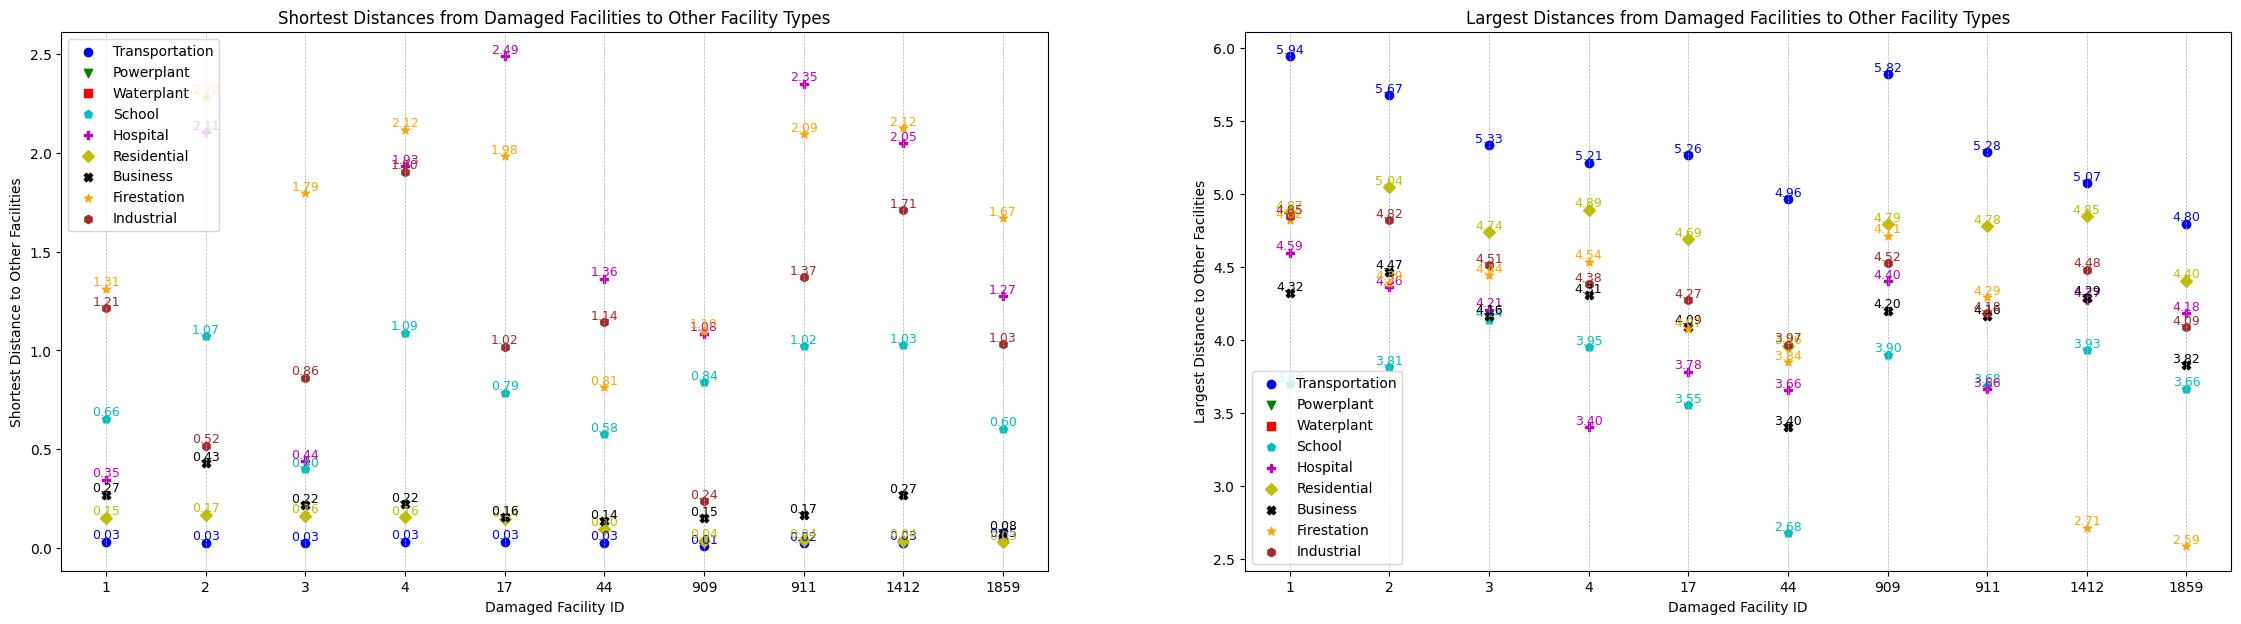

In [12]:

# Assuming id_Transportation, coords_Transportation, etc., are defined elsewhere
all_facilities = {
    'Transportation': {id: coords for id, coords in zip(id_Transportation, coords_Transportation)},
    'Powerplant': {id: coords for id, coords in zip(id_Powerplant, coords_Powerplant)},
    'Waterplant': {id: coords for id, coords in zip(id_Waterplant, coords_Waterplant)},
    'School': {id: coords for id, coords in zip(id_School, coords_School)},
    'Hospital': {id: coords for id, coords in zip(id_Hospital, coords_Hospital)},
    'Residential': {id: coords for id, coords in zip(id_Residential, coords_Residential)},
    'Business': {id: coords for id, coords in zip(id_Business, coords_Business)},
    'Firestation': {id: coords for id, coords in zip(id_Firestation, coords_Firestation)},
    'Industrial': {id: coords for id, coords in zip(id_Industrial, coords_Industrial)}
}

# Counts of each facility type
counts = [
    len(coords_Transportation),
    len(coords_Powerplant),
    len(coords_Waterplant),
    len(coords_School),
    len(coords_Hospital),
    len(coords_Residential),
    len(coords_Business),
    len(coords_Firestation),
    len(coords_Industrial)
]

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def get_facility_type_and_id(facility_id, all_facilities):
    for facility_type, facilities in all_facilities.items():
        if facility_id in facilities:
            return facility_type, facility_id
    raise ValueError(f"Facility ID {facility_id} not found")

def calculate_shortest_distances(damaged_facilities, all_facilities):
    shortest_distances = {facility_id: {} for facility_id in damaged_facilities}
    for damaged_id in damaged_facilities:
        damaged_type, _ = get_facility_type_and_id(damaged_id, all_facilities)
        damaged_coord = all_facilities[damaged_type][damaged_id]

        for facility_type, facilities in all_facilities.items():
            min_distance = float('inf')
            for facility_id, coord in facilities.items():
                if facility_id in damaged_facilities:
                    continue
                distance = euclidean_distance(damaged_coord, coord)
                min_distance = min(min_distance, distance)
            shortest_distances[damaged_id][facility_type] = min_distance
    return shortest_distances

def calculate_largest_distances(damaged_facilities, all_facilities):
    largest_distances = {facility_id: {} for facility_id in damaged_facilities}
    for damaged_id in damaged_facilities:
        damaged_type, _ = get_facility_type_and_id(damaged_id, all_facilities)
        damaged_coord = all_facilities[damaged_type][damaged_id]

        for facility_type, facilities in all_facilities.items():
            max_distance = float('-inf')
            for facility_id, coord in facilities.items():
                if facility_id in damaged_facilities:
                    continue
                distance = euclidean_distance(damaged_coord, coord)
                max_distance = max(max_distance, distance)
            largest_distances[damaged_id][facility_type] = max_distance
    return largest_distances

# Calculate distances
shortest_distances = calculate_shortest_distances(damaged_facilities, all_facilities)
largest_distances = calculate_largest_distances(damaged_facilities, all_facilities)

# Generate x-axis values (1, 2, 3, ..., number of damaged facilities)
x_values = range(1, len(damaged_facilities) + 1)

# Define markers, colors, and facility types
markers = ['o', 'v', 's', 'p', 'P', 'D', 'X', '*', 'h']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'brown']
facility_types = ['Transportation', 'Powerplant', 'Waterplant', 'School', 'Hospital', 'Residential', 'Business', 'Firestation', 'Industrial']

# Initialize figure and axes for side by side plots
plt.figure(figsize=(28, 7))

# Plot for shortest distances
plt.subplot(1, 2, 1)
for i, facility_type in enumerate(facility_types):
    distances = [shortest_distances[facility_id][facility_type] for facility_id in damaged_facilities]
    plt.scatter(x_values, distances, marker=markers[i], color=colors[i], label=facility_type)
    for x, y in zip(x_values, distances):
        plt.text(x, y, f'{y:.2f}', color=colors[i], fontsize=9, ha='center', va='bottom')
plt.xticks(x_values, damaged_facilities)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.xlabel('Damaged Facility ID')
plt.ylabel('Shortest Distance to Other Facilities')
plt.title('Shortest Distances from Damaged Facilities to Other Facility Types')
plt.legend()

# Plot for largest distances
plt.subplot(1, 2, 2)
for i, facility_type in enumerate(facility_types):
    distances = [largest_distances[facility_id][facility_type] for facility_id in damaged_facilities]
    plt.scatter(x_values, distances, marker=markers[i], color=colors[i], label=facility_type)
    for x, y in zip(x_values, distances):
        plt.text(x, y, f'{y:.2f}', color=colors[i], fontsize=9, ha='center', va='bottom')
plt.xticks(x_values, damaged_facilities)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.xlabel('Damaged Facility ID')
plt.ylabel('Largest Distance to Other Facilities')
plt.title('Largest Distances from Damaged Facilities to Other Facility Types')
plt.legend()

# Show the plot
plt.show()


In [13]:
import gym
from gym import spaces
import itertools
import numpy as np
from mesa import Agent
from mesa.space import ContinuousSpace
from munkres import Munkres

class MultiFacilityEnv(gym.Env):
    environment_name = "Multi-Facility Environment"
    def __init__(self, id_Transportation, id_Powerplant, id_Waterplant, id_School, id_Hospital, id_Residential, id_Business, id_Firestation, id_Industrial,
                 coords_Transportation, coords_Powerplant, coords_Waterplant,
                 coords_School, coords_Hospital, coords_Residential, coords_Business, coords_Firestation, coords_Industrial,
                 functionalities_Transportation, functionalities_Powerplant, functionalities_Waterplant,
                 functionalities_School, functionalities_Hospital, functionalities_Residential,
                 functionalities_Business, functionalities_Industrial, functionalities_Firestation, num_crews, depend_distance, max_steps, damaged_facilities, total_budget):
        super(MultiFacilityEnv, self).__init__()

        # Initialize variables for all types of facilities
        self.coords_Transportation = coords_Transportation
        self.coords_Powerplant = coords_Powerplant
        self.coords_Waterplant = coords_Waterplant
        self.coords_School = coords_School
        self.coords_Hospital = coords_Hospital
        self.coords_Residential = coords_Residential
        self.coords_Business = coords_Business
        self.coords_Firestation = coords_Firestation
        self.coords_Industrial = coords_Industrial

        self.functionalities_Transportation = functionalities_Transportation
        self.functionalities_Powerplant = functionalities_Powerplant
        self.functionalities_Waterplant = functionalities_Waterplant
        self.functionalities_School = functionalities_School
        self.functionalities_Hospital = functionalities_Hospital
        self.functionalities_Residential = functionalities_Residential
        self.functionalities_Business = functionalities_Business
        self.functionalities_Firestation = functionalities_Firestation
        self.functionalities_Industrial = functionalities_Industrial

        self.initial_functionalities_Transportation = list(functionalities_Transportation)
        self.initial_functionalities_Powerplant = list(functionalities_Powerplant)
        self.initial_functionalities_Waterplant = list(functionalities_Waterplant)
        self.initial_functionalities_School = list(functionalities_School)
        self.initial_functionalities_Hospital = list(functionalities_Hospital)
        self.initial_functionalities_Residential = list(functionalities_Residential)
        self.initial_functionalities_Business = list(functionalities_Business)
        self.initial_functionalities_Firestation = list(functionalities_Firestation)
        self.initial_functionalities_Industrial = list(functionalities_Industrial)

        self.num_crews = num_crews
        self.depend_distance = depend_distance
        self.max_steps = max_steps
        self.damaged_facilities = damaged_facilities
        self.total_budget = total_budget
        self.current_step = 0

        self.model = InfrastructureModel(id_Transportation, id_Powerplant, id_Waterplant, id_School, id_Hospital, id_Residential, id_Business, id_Firestation, id_Industrial,
                                        coords_Transportation, coords_Powerplant, coords_Waterplant,
                                        coords_School, coords_Hospital, coords_Residential, coords_Business, coords_Firestation, coords_Industrial,
                                        functionalities_Transportation, functionalities_Powerplant, functionalities_Waterplant,
                                        functionalities_School, functionalities_Hospital, functionalities_Residential,
                                        functionalities_Business, functionalities_Industrial, functionalities_Firestation)

        self.actions = list(itertools.combinations(self.damaged_facilities, self.num_crews))
        self.action_space = spaces.Discrete(len(self.actions))

        self.observation_space = spaces.Box(low=0, high=1, shape=(2 * self.model.num_agents,))

        self.current_episode = 0
        self.crew_assignment = []
        self.episode_avg_rewards = []  # Store episode average rewards
        self.action_counts = {}
        self.total_cost = 0
        self.prev_crew_assignment = None

    def reset(self):
        self.remaining_budget = self.total_budget
        self.prev_crew_assignment = None

        # Reset functionalities for all types of facilities
        self.functionalities_Transportation = list(self.initial_functionalities_Transportation)
        self.functionalities_Powerplant = list(self.initial_functionalities_Powerplant)
        self.functionalities_Waterplant = list(self.initial_functionalities_Waterplant)
        self.functionalities_School = list(self.initial_functionalities_School)
        self.functionalities_Hospital = list(self.initial_functionalities_Hospital)
        self.functionalities_Residential = list(self.initial_functionalities_Residential)
        self.functionalities_Business = list(self.initial_functionalities_Business)
        self.functionalities_Firestation = list(self.initial_functionalities_Firestation)
        self.functionalities_Industrial = list(self.initial_functionalities_Industrial)

        self.prev_functionalities_Transportation = list(self.initial_functionalities_Transportation)
        self.prev_functionalities_Powerplant = list(self.initial_functionalities_Powerplant)
        self.prev_functionalities_Waterplant = list(self.initial_functionalities_Waterplant)
        self.prev_functionalities_School = list(self.initial_functionalities_School)
        self.prev_functionalities_Hospital = list(self.initial_functionalities_Hospital)
        self.prev_functionalities_Residential = list(self.initial_functionalities_Residential)
        self.prev_functionalities_Business = list(self.initial_functionalities_Business)
        self.prev_functionalities_Firestation = list(self.initial_functionalities_Firestation)
        self.prev_functionalities_Industrial = list(self.initial_functionalities_Industrial)

        self.model = InfrastructureModel(id_Transportation, id_Powerplant, id_Waterplant, id_School, id_Hospital, id_Residential, id_Business, id_Firestation, id_Industrial,
                                        coords_Transportation, coords_Powerplant, coords_Waterplant,
                                        coords_School, coords_Hospital, coords_Residential, coords_Business, coords_Firestation, coords_Industrial,
                                        functionalities_Transportation, functionalities_Powerplant, functionalities_Waterplant,
                                        functionalities_School, functionalities_Hospital, functionalities_Residential,
                                        functionalities_Business, functionalities_Industrial, functionalities_Firestation)
        all_functionalities = (self.functionalities_Transportation + self.functionalities_Powerplant + self.functionalities_Waterplant +
                               self.functionalities_School + self.functionalities_Hospital + self.functionalities_Residential +
                               self.functionalities_Business + self.functionalities_Firestation + self.functionalities_Industrial)

        # Calculate the initial sum of repair needs for damaged facilities
        self.initial_repair_sum = sum(1 - all_functionalities[i] for i in self.damaged_facilities)
        self.current_repair_sum = self.initial_repair_sum  # Initialize the current repair sum

        self.actions = list(itertools.combinations(self.damaged_facilities, self.num_crews))
        self.action_space = spaces.Discrete(len(self.actions))

        self.step_functionalities_Transportation = []
        self.step_functionalities_Powerplant = []
        self.step_functionalities_Waterplant = []
        self.step_functionalities_School = []
        self.step_functionalities_Hospital = []
        self.step_functionalities_Residential = []
        self.step_functionalities_Business = []
        self.step_functionalities_Firestation = []
        self.step_functionalities_Industrial = []

        self.step_rewards = []
        self.current_step = 0
        self.all_functionalities = []
        self.current_episode += 1

        # Observation: current functionalities and differences
        observation = self._generate_observation()
        return observation

    def step(self, action):
        if action in self.action_counts:
            self.action_counts[action] += 1
        else:
            self.action_counts[action] = 1

        crew_assignment = self.actions[action]
        self.crew_assignment = crew_assignment
        action_cost = self.calculate_action_cost(crew_assignment)

        self.remaining_budget -= action_cost

        for facility in crew_assignment:
            # Repair the facilities using the crew
            self.model.schedule._agents[facility].repair_agent(facility, self.depend_distance)

        # Update functionalities
        self.functionalities_Transportation = [agent.functionality for agent in self.model.schedule.agents if isinstance(agent, TransportationAgent)]
        self.functionalities_Powerplant = [agent.functionality for agent in self.model.schedule.agents if isinstance(agent, PowerplantAgent)]
        self.functionalities_Waterplant = [agent.functionality for agent in self.model.schedule.agents if isinstance(agent, WaterplantAgent)]
        self.functionalities_School = [agent.functionality for agent in self.model.schedule.agents if isinstance(agent, SchoolAgent)]
        self.functionalities_Hospital = [agent.functionality for agent in self.model.schedule.agents if isinstance(agent, HospitalAgent)]
        self.functionalities_Residential = [agent.functionality for agent in self.model.schedule.agents if isinstance(agent, ResidentialAgent)]
        self.functionalities_Business = [agent.functionality for agent in self.model.schedule.agents if isinstance(agent, BusinessAgent)]
        self.functionalities_Firestation = [agent.functionality for agent in self.model.schedule.agents if isinstance(agent, FirestationAgent)]
        self.functionalities_Industrial = [agent.functionality for agent in self.model.schedule.agents if isinstance(agent, IndustrialAgent)]

        # Total cost for the current step
        total_step_cost = action_cost

        # Update the total cost for the episode
        self.total_cost += total_step_cost

        # Calculate reward as the average functionality.
        reward = self.compute_reward(action)

        observation = self._generate_observation()

        # Check if all facilities are repaired
        done = self.check_done()

        if self.current_episode % 1000 == 0:
            print(f"===== Episode {self.current_episode} / Step {self.current_step} =====")
            print("Actions List:", self.actions)
            print("Crew Assignment:", crew_assignment)
            print("Action:", action)
            print(f"Functionality for Transportation: {self.functionalities_Transportation}")
            print(f"Functionality for Powerplant: {self.functionalities_Powerplant}")
            print(f"Functionality for Waterplant: {self.functionalities_Waterplant}")
            print(f"Functionality for School: {self.functionalities_School}")
            print(f"Functionality for Hospital: {self.functionalities_Hospital}")
            print(f"Functionality for Residential: {self.functionalities_Residential}")
            print(f"Functionality for Business: {self.functionalities_Business}")
            print(f"Functionality for Firestation: {self.functionalities_Firestation}")
            print(f"Functionality for Industrial: {self.functionalities_Industrial}")
            print(f"Reward: {reward}")
            print(action_cost)

        # Generate the action mask
        action_mask = self.generate_mask()

        # Increment the step count after each step
        self.current_step += 1

        info = {
            'step_cost': total_step_cost,
            'total_cost': self.total_cost
        }

        # Storing the functionalities and reward at each step
        self.step_rewards.append(reward)

        self.prev_functionalities_Transportation = list(self.functionalities_Transportation)
        self.prev_functionalities_Powerplant = list(self.functionalities_Powerplant)
        self.prev_functionalities_Waterplant = list(self.functionalities_Waterplant)
        self.prev_functionalities_School = list(self.functionalities_School)
        self.prev_functionalities_Hospital = list(self.functionalities_Hospital)
        self.prev_functionalities_Residential = list(self.functionalities_Residential)
        self.prev_functionalities_Business = list(self.functionalities_Business)
        self.prev_functionalities_Firestation = list(self.functionalities_Firestation)
        self.prev_functionalities_Industrial = list(self.functionalities_Industrial)

        # Return new observation, reward, done and info
        return observation, reward, done, False, info

    def _generate_observation(self):
        # Calculate functionality differences for each type of facility
        functionality_differences_Transportation = [func - prev_func for func, prev_func in zip(self.functionalities_Transportation, self.prev_functionalities_Transportation)]
        functionality_differences_Powerplant = [func - prev_func for func, prev_func in zip(self.functionalities_Powerplant, self.prev_functionalities_Powerplant)]
        functionality_differences_Waterplant = [func - prev_func for func, prev_func in zip(self.functionalities_Waterplant, self.prev_functionalities_Waterplant)]
        functionality_differences_School = [func - prev_func for func, prev_func in zip(self.functionalities_School, self.prev_functionalities_School)]
        functionality_differences_Hospital = [func - prev_func for func, prev_func in zip(self.functionalities_Hospital, self.prev_functionalities_Hospital)]
        functionality_differences_Residential = [func - prev_func for func, prev_func in zip(self.functionalities_Residential, self.prev_functionalities_Residential)]
        functionality_differences_Business = [func - prev_func for func, prev_func in zip(self.functionalities_Business, self.prev_functionalities_Business)]
        functionality_differences_Firestation = [func - prev_func for func, prev_func in zip(self.functionalities_Firestation, self.prev_functionalities_Firestation)]
        functionality_differences_Industrial = [func - prev_func for func, prev_func in zip(self.functionalities_Industrial, self.prev_functionalities_Industrial)]

        all_functionalities = (self.functionalities_Transportation + self.functionalities_Powerplant + self.functionalities_Waterplant +
                               self.functionalities_School + self.functionalities_Hospital + self.functionalities_Residential +
                               self.functionalities_Business + self.functionalities_Firestation + self.functionalities_Industrial)
        self.current_repair_sum = sum(1 - all_functionalities[i] for i in self.damaged_facilities)

        # Calculate the progress percentage, handling division by zero
        if self.initial_repair_sum == 0:
            progress_percentage = 100  # If initial repair sum is 0, assume 100% progress
        else:
            progress_percentage = ((self.initial_repair_sum - self.current_repair_sum) / self.initial_repair_sum) * 100


        budget_utilization_percentage = ((self.total_budget - self.remaining_budget) / self.total_budget) * 100 if self.total_budget != 0 else 0

        # Concatenate functionalities and their differences for all types of facilities
        observation = (self.functionalities_Transportation + functionality_differences_Transportation +
                       self.functionalities_Powerplant + functionality_differences_Powerplant +
                       self.functionalities_Waterplant + functionality_differences_Waterplant +
                       self.functionalities_School + functionality_differences_School +
                       self.functionalities_Hospital + functionality_differences_Hospital +
                       self.functionalities_Residential + functionality_differences_Residential +
                       self.functionalities_Business + functionality_differences_Business +
                       self.functionalities_Firestation + functionality_differences_Firestation +
                       self.functionalities_Industrial + functionality_differences_Industrial +
                       [progress_percentage] + [budget_utilization_percentage])
        return observation

    def calculate_distance(self, facility_id_a, facility_id_b):
        pos_a = self.model.schedule._agents[facility_id_a].pos
        pos_b = self.model.schedule._agents[facility_id_b].pos
        return np.sqrt((pos_a[0] - pos_b[0])**2 + (pos_a[1] - pos_b[1])**2)

    def calculate_action_cost(self, crew_assignment):
        # Initialize repair cost
        repair_cost = 0
        repair_cost = sum(1 for facility in crew_assignment if self.model.schedule._agents[facility].functionality < 1)

        # Initialize moving cost
        moving_cost = 0
        if self.prev_crew_assignment is not None:
            moving_cost = self.calculate_moving_cost(self.prev_crew_assignment, crew_assignment)
        else:
            moving_cost = 0

        # Total action cost
        self.prev_crew_assignment = crew_assignment
        action_cost = repair_cost + moving_cost

        return action_cost

    def calculate_moving_cost(self, prev_assignment, current_assignment):
        all_functionalities = (self.functionalities_Transportation + self.functionalities_Powerplant + self.functionalities_Waterplant +
                               self.functionalities_School + self.functionalities_Hospital + self.functionalities_Residential +
                               self.functionalities_Business + self.functionalities_Firestation + self.functionalities_Industrial)
        damaged_functionalities = [all_functionalities[i] for i in self.damaged_facilities]
        # Filter unchanged facilities and find only those that have changed
        prev_set = set(self.prev_crew_assignment)
        current_set = set(self.crew_assignment)
        unchanged = prev_set.intersection(current_set)
        changed_from_prev = prev_set - unchanged
        current_set_filtered = {facility for facility in current_set
                                if facility in self.damaged_facilities and all_functionalities[facility] < 1}

        changed_to_current = current_set_filtered - unchanged

        if not changed_from_prev or not changed_to_current:
            return 0  # No moving cost if no change in assignments

        # Create distance matrix for changed facilities
        max_dim = max(len(changed_from_prev), len(changed_to_current))
        distance_matrix = np.zeros((max_dim, max_dim))
        for i, prev_id in enumerate(changed_from_prev):
            for j, current_id in enumerate(changed_to_current):
                distance_matrix[i][j] = self.calculate_distance(prev_id, current_id)

        # Apply Hungarian algorithm
        munkres = Munkres()
        indexes = munkres.compute(distance_matrix.copy())  # Munkres algorithm modifies the matrix in-place
        moving_cost = 0.005 * sum(distance_matrix[i][j] for i, j in indexes)
        return moving_cost

    def compute_reward(self, action):
        weights = {
                  'Transportation': 0.20,
                  'Powerplant': 0.20,
                  'Waterplant': 0.15,
                  'School': 0.05,
                  'Hospital': 0.30,
                  'Residential': 0.05,
                  'Business': 0.05,
                  'Firestation': 0.20,
                  'Industrial': 0.05
        }

        # Initialize a dictionary to store total functionality and counts for each type
        total_functionalities = {infra_type: 0 for infra_type in weights}
        total_counts = {infra_type: 0 for infra_type in weights}
        start_index = 0

        # Process each infrastructure type
        for infra_type, num in [('Transportation', len(self.coords_Transportation)),
                                ('Powerplant', len(self.coords_Powerplant)),
                                ('Waterplant', len(self.coords_Waterplant)),
                                ('School', len(self.coords_School)),
                                ('Hospital', len(self.coords_Hospital)),
                                ('Residential', len(self.coords_Residential)),
                                ('Business', len(self.coords_Business)),
                                ('Firestation', len(self.coords_Firestation)),
                                ('Industrial', len(self.coords_Industrial))]:

            functionalities = getattr(self, f'functionalities_{infra_type}')

            for functionality in functionalities:
                total_functionalities[infra_type] += functionality
                total_counts[infra_type] += 1

            start_index += num

        # Calculate the average functionality for each type and apply weights
        weighted_sum = 0
        for infra_type in weights:
            if total_counts[infra_type] > 0:
                avg_functionality = total_functionalities[infra_type] / total_counts[infra_type]
                weighted_sum += avg_functionality * weights[infra_type]

        crew_assignment = self.actions[action]
        action_cost = self.calculate_action_cost(crew_assignment)
        # Apply penalty if action cost exceeds remaining budget
        if action_cost > self.remaining_budget:
            exceeded_amount = action_cost - self.remaining_budget
            penalty = (exceeded_amount / self.total_budget) + 1.0
            reward = weighted_sum - penalty
        else:
            reward = weighted_sum
        return reward

    def check_done(self):
        all_functionalities = (self.functionalities_Transportation + self.functionalities_Powerplant + self.functionalities_Waterplant +
                               self.functionalities_School + self.functionalities_Hospital + self.functionalities_Residential +
                               self.functionalities_Business + self.functionalities_Firestation + self.functionalities_Industrial)
        all_damaged_repaired = all(all_functionalities[i] >= 1 for i in self.damaged_facilities)
        return all_damaged_repaired or self.current_step >= self.max_steps  # episode ends when all facilities are repaired

    def render(self, mode="human"):
        pass

    def close(self):
        pass

    def seed(self, seed=None):
        np.random.seed(seed)

    def print_final_action_counts(self):
        sorted_action_counts = {k: self.action_counts[k] for k in sorted(self.action_counts.keys())}
        print(f"Final Action Counts: {sorted_action_counts}")

    def generate_mask(self):
        all_functionalities = (self.functionalities_Transportation + self.functionalities_Powerplant + self.functionalities_Waterplant +
                               self.functionalities_School + self.functionalities_Hospital + self.functionalities_Residential +
                               self.functionalities_Business + self.functionalities_Firestation + self.functionalities_Industrial)
        damaged_functionalities = [all_functionalities[i] for i in self.damaged_facilities]
        total_damaged = sum(1 for func in damaged_functionalities if func < 1)  # Total number of currently damaged facilities
        max_crews = 3  # Maximum number of available repair crews
        mask = []

        for action_list in self.actions:
            damaged_in_action = sum(1 for facility_id in action_list if facility_id in self.damaged_facilities and all_functionalities[facility_id] < 1)

            if total_damaged >= max_crews:
                mask_value = 1 if damaged_in_action == max_crews else 0
            else:
                mask_value = 1 if damaged_in_action == total_damaged else 0

            mask.append(mask_value)
        return mask


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import namedtuple, deque
import random

# Assuming the necessary imports and definitions for MultiFacilityEnv are already done

# Create your environment
env = MultiFacilityEnv(
    id_Transportation, id_Powerplant, id_Waterplant, id_School, id_Hospital, id_Residential, id_Business, id_Firestation, id_Industrial,
    coords_Transportation, coords_Powerplant, coords_Waterplant,
    coords_School, coords_Hospital, coords_Residential, coords_Business, coords_Firestation, coords_Industrial,
    functionalities_Transportation, functionalities_Powerplant, functionalities_Waterplant,
    functionalities_School, functionalities_Hospital, functionalities_Residential,
    functionalities_Business, functionalities_Industrial, functionalities_Firestation,
    num_crews, depend_distance, max_steps, damaged_facilities, total_budget
)

# If GPU is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

class ReplayMemory(object):
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

class DQN(nn.Module):
    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 256)
        self.layer2 = nn.Linear(256, 256)
        self.layer3 = nn.Linear(256, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

# Initialize replay memory
memory = ReplayMemory(10000)


Streaming output truncated to the last 5000 lines.
<ipython-input-10-c6580da6d54c>:240: UserWarning: Agent 2615 is being placed with
place_agent() despite already having the position (-2.083853147179787, -0.6714862179089249). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(agent, (x, y))
<ipython-input-10-c6580da6d54c>:240: UserWarning: Agent 2616 is being placed with
place_agent() despite already having the position (-1.260010224700558, -1.995144612251835). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(agent, (x, y))
<ipython-input-10-c6580da6d54c>:240: UserWarning: Agent 2617 is being placed with
place_agent() despite already having the position (1.952562061106264, -1.517984206841912). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agen

In [15]:
print(len(memory))

0


In [ ]:
from itertools import count

# Run a single episode for each of the 5 random agents
for i in range(200):
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    for t in count():
        action_mask = env.generate_mask()
        action_mask = torch.tensor(action_mask, dtype=torch.float32, device=device)
        valid_actions = torch.nonzero(action_mask, as_tuple=False).squeeze()
        if valid_actions.dim() == 0:
            valid_actions = valid_actions.unsqueeze(0)

        # Check if there are any valid actions
        if len(valid_actions) > 0:
            random_action = valid_actions[torch.randint(0, len(valid_actions), (1,))]
            action = torch.tensor([[random_action]], device=device, dtype=torch.long)
            observation, reward, terminated, truncated, _ = env.step(action.item())
            reward = torch.tensor([reward], device=device)
            done = env.check_done()

            if terminated:
                next_state = None
            else:
                next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

            # Store the transition in memory
            memory.push(state, action, next_state, reward)

            state = next_state
        else:
            # Handle the case where there are no valid actions - e.g., terminate the episode
            terminated = True

        if terminated:
            break


In [16]:
import torch.optim as optim
import math
import random

# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 32
GAMMA = 0.95
EPS_START = 0.99
EPS_END = 0.05
EPS_DECAY = 400000
TAU = 0.005
initial_LR = 0.001

# Get number of actions from gym action space
n_actions = env.action_space.n
# Get the number of state observations
state = env.reset()
n_observations = len(state)

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=initial_LR, amsgrad=True)

steps_done = 0

def select_action(state, action_mask):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1

    # Print epsilon every 100 steps
    if steps_done % 10000 == 0:
        print(f"Epsilon at step {steps_done}: {eps_threshold}")

    if sample > eps_threshold:
        with torch.no_grad():
            # Get the Q-values from the policy network
            q_values = policy_net(state)
            # Set the Q-values of invalid actions to a very low value
            min_q_value = torch.min(q_values)
            masked_q_values = q_values.clone()
            action_mask_reshaped = action_mask.unsqueeze(0)
            masked_q_values[action_mask_reshaped == 0] = min_q_value - 10

            # Return the action with the highest masked Q-value
            return masked_q_values.max(1)[1].view(1, 1)
    else:
        # Sample a valid random action
        valid_actions = torch.nonzero(action_mask, as_tuple=False).squeeze()
        if valid_actions.dim() == 0:
            valid_actions = valid_actions.unsqueeze(0)
        random_action = valid_actions[torch.randint(0, len(valid_actions), (1,))]
        return torch.tensor([[random_action]], device=device, dtype=torch.long)

episode_durations = []


Streaming output truncated to the last 5000 lines.
<ipython-input-10-c6580da6d54c>:240: UserWarning: Agent 2615 is being placed with
place_agent() despite already having the position (-2.083853147179787, -0.6714862179089249). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(agent, (x, y))
<ipython-input-10-c6580da6d54c>:240: UserWarning: Agent 2616 is being placed with
place_agent() despite already having the position (-1.260010224700558, -1.995144612251835). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(agent, (x, y))
<ipython-input-10-c6580da6d54c>:240: UserWarning: Agent 2617 is being placed with
place_agent() despite already having the position (1.952562061106264, -1.517984206841912). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agen

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(show_result=False, save_format='svg', filename_prefix='10_closest_damaged_facilities_3_crews_58_budget'):
    window_size = 100  # Size of the moving average window

    if len(episode_avg_rewards) >= window_size and len(episode_losses) >= window_size:
        # Calculate moving averages
        ma_rewards = np.convolve(episode_avg_rewards, np.ones(window_size)/window_size, mode='valid')
        ma_losses = np.convolve(episode_losses, np.ones(window_size)/window_size, mode='valid')

        # Create a single figure and two subplots side by side
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), constrained_layout=True)

        # Plotting Average Rewards on the first subplot
        ax1.set_title('Result - Average Rewards' if show_result else 'Training - Average Rewards', fontsize=14)
        ax1.set_xlabel('Episode', fontsize=14)
        ax1.set_ylabel('Average rewards', fontsize=14)
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax1.plot(episode_avg_rewards, label='Average Rewards')
        ax1.plot(range(window_size - 1, len(episode_avg_rewards)), ma_rewards, label=f'Moving average of past {window_size} episodes')
        ax1.legend(fontsize=12)
        ax1.tick_params(axis='both', labelsize=12)

        # Plotting Loss on the second subplot
        ax2.set_title('Result - Loss' if show_result else 'Training - Loss', fontsize=14)
        ax2.set_xlabel('Episode', fontsize=14)
        ax2.set_ylabel('Loss', fontsize=14)
        ax2.grid(True, which='major', linestyle='--', linewidth=0.5)
        ax2.semilogy(episode_losses, label='Loss of each episode')
        # ax2.semilogy(range(window_size - 1, len(episode_losses)), ma_losses, label=f'MA{window_size}')
        ax2.legend(fontsize=12)
        ax2.tick_params(axis='both', labelsize=12)

        plt.show()  # Show the combined figure with both subplots
        fig.savefig(f'{filename_prefix}_combined.{save_format}', format=save_format, dpi=1200, bbox_inches='tight', pad_inches=0.1)
        plt.close(fig)  # Close the figure to prevent it from displaying again in the notebook output

    else:
        print(f"Not enough data points to plot moving average. Need at least {window_size} points.")


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython import display

def plot_metrics(show_result=False, save_format='svg', filename_prefix='10_closest_damaged_facilities_3_crews_58_budget'):
    window_size = 100  # Size of the moving average window

    # Check if there are enough data points to calculate moving average
    if len(episode_avg_rewards) >= window_size and len(episode_losses) >= window_size:
        # Calculate moving averages
        ma_rewards = np.convolve(episode_avg_rewards, np.ones(window_size)/window_size, mode='valid')
        ma_losses = np.convolve(episode_losses, np.ones(window_size)/window_size, mode='valid')

        # Plotting Average Rewards
        fig1, ax1 = plt.subplots(figsize=(6, 6))
        ax1.set_title('Result - Average Rewards' if show_result else 'Training - Average Rewards')
        ax1.set_xlabel('Episode')
        ax1.set_ylabel('Average rewards')
        ax1.plot(episode_avg_rewards, label='Average Rewards')
        ax1.plot(range(window_size - 1, len(episode_avg_rewards)), ma_rewards, label=f'MA{window_size}')
        ax1.legend()
        plt.show()
        fig1.savefig(f'{filename_prefix}_rewards.{save_format}', format=save_format, dpi=1200)
        plt.close(fig1)

        # Plotting Loss
        fig2, ax2 = plt.subplots(figsize=(6, 6))
        ax2.set_title('Result - Loss' if show_result else 'Training - Loss')
        ax2.set_xlabel('Episode')
        ax2.set_ylabel('Loss')
        ax2.grid(True, which='major', linestyle='--', linewidth=0.5)
        ax2.semilogy(episode_losses, label='Loss')
        ax2.semilogy(range(window_size - 1, len(episode_losses)), ma_losses, label=f'MA{window_size}')
        ax2.legend()
        plt.show()
        fig2.savefig(f'{filename_prefix}_loss.{save_format}', format=save_format, dpi=1200)
        plt.close(fig2)

        plt.pause(0.001)  # pause a bit so that plots are updated

        # Check if running in IPython (Jupyter notebook)
        is_ipython = 'IPKernelApp' in get_ipython().config
        if is_ipython:
            if not show_result:
                display.display(plt.gcf())
                display.clear_output(wait=True)
            else:
                display.display(plt.gcf())

        plt.close()
    else:
        print(f"Not enough data points to plot moving average. Need at least {window_size} points.")


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))

    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)

    # Check if the list is empty before concatenating
    next_states_list = [s for s in batch.next_state if s is not None]
    if not next_states_list:  # If the list is empty
        return  # Return early from the function

    # Move tensors to the correct device before concatenation
    non_final_next_states = torch.cat([s.to(device) for s in next_states_list])
    state_batch = torch.cat([s.to(device) for s in batch.state])
    action_batch = torch.cat([s.to(device) for s in batch.action])
    reward_batch = torch.cat([s.to(device) for s in batch.reward])

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

    return loss.item()


In [ ]:
import os
import json
import pickle
import torch
import numpy as np
from collections import deque

# if GPU is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the folder where you want to save your models and metrics
save_folder = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/Training_1"

# Create the folder if it doesn't exist
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Define paths for saving and loading
checkpoint_path = os.path.join(save_folder, "training_checkpoint.pth")
replay_memory_save_path = os.path.join(save_folder, "replay_memory.pkl")

def save_checkpoint(episode, policy_net, target_net, optimizer, memory, episode_avg_rewards, episode_losses, steps_done):
    torch.save({
        'episode': episode,
        'policy_model_state_dict': policy_net.state_dict(),
        'target_model_state_dict': target_net.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'episode_avg_rewards': episode_avg_rewards,
        'episode_losses': episode_losses,
        'steps_done': steps_done
    }, checkpoint_path)

    # Save replay memory separately due to its potential large size
    with open(replay_memory_save_path, 'wb') as f:
        pickle.dump(memory, f)

    print(f"Checkpoint saved at episode {episode}")

def load_checkpoint(policy_net, target_net, optimizer):
    if os.path.exists(checkpoint_path):
        try:
          checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
        except:
          checkpoint = torch.load(checkpoint_path)
        policy_net.load_state_dict(checkpoint['policy_model_state_dict'])
        target_net.load_state_dict(checkpoint['target_model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        episode = checkpoint['episode']
        episode_avg_rewards = checkpoint['episode_avg_rewards']
        episode_losses = checkpoint['episode_losses']
        steps_done = checkpoint['steps_done']

        # Load replay memory
        if os.path.exists(replay_memory_save_path):
            with open(replay_memory_save_path, 'rb') as f:
                memory = pickle.load(f)
        else:
            memory = ReplayMemory(10000)  # Initialize with your desired capacity

        print(f"Resuming training from episode {episode}")
        return episode, memory, episode_avg_rewards, episode_losses, steps_done
    else:
        print("No checkpoint found. Starting from scratch.")
        return 0, ReplayMemory(10000), [], [], 0

def print_progress(episode, avg_reward, loss, action, action_counts):
    print(f"Episode: {episode}")
    print(f"Average Reward: {avg_reward:.4f}")
    if loss is not None:
        print(f"Loss: {loss:.4f}")
    print(f"Action Taken: {action}")
    print(f"Action Count: {action_counts}")
    print("-" * 40)

# Initialize your models, optimizer, and other necessary components here
policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
optimizer = optim.AdamW(policy_net.parameters(), lr=initial_LR, amsgrad=True)

# Load checkpoint if it exists
start_episode, memory, episode_avg_rewards, episode_losses, steps_done = load_checkpoint(policy_net, target_net, optimizer)

num_episodes = 5000

for i_episode in range(start_episode, num_episodes):
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    rewards_in_episode = []
    losses_in_episode = []

    for t in count():
        action_mask = env.generate_mask()
        action_mask = torch.tensor(action_mask, dtype=torch.float32, device=device)
        action = select_action(state, action_mask)
        observation, reward, terminated, truncated, _ = env.step(action.item())
        rewards_in_episode.append(reward)
        reward = torch.tensor([reward], device=device)
        done = env.check_done()

        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        memory.push(state, action, next_state, reward)
        state = next_state

        loss = optimize_model()
        if loss is not None:
            losses_in_episode.append(loss)

        # Soft update of the target network's weights
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            episode_durations.append(t+1)
            episode_avg_reward = np.mean(rewards_in_episode)
            episode_avg_rewards.append(episode_avg_reward)
            episode_loss = np.mean(losses_in_episode) if losses_in_episode else None
            if episode_loss is not None:
                episode_losses.append(episode_loss)

            # Print progress after each episode
            print_progress(i_episode, episode_avg_reward, episode_loss, action.item(), env.action_counts)
            break

    # Save checkpoint every 500 episodes
    if (i_episode + 1) % 50 == 0:
        save_checkpoint(i_episode + 1, policy_net, target_net, optimizer, memory, episode_avg_rewards, episode_losses, steps_done)
        print(f"Checkpoint saved at episode {i_episode + 1}")

    env.print_final_action_counts()

# Final save
save_checkpoint(num_episodes, policy_net, target_net, optimizer, memory, episode_avg_rewards, episode_losses, steps_done)
print("Training completed. Final checkpoint saved.")

<ipython-input-18-f5f96ad5d4fd>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))


Resuming training from episode 3900


Streaming output truncated to the last 5000 lines.
<ipython-input-8-c6580da6d54c>:240: UserWarning: Agent 2615 is being placed with
place_agent() despite already having the position (-2.083853147179787, -0.6714862179089249). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(agent, (x, y))
<ipython-input-8-c6580da6d54c>:240: UserWarning: Agent 2616 is being placed with
place_agent() despite already having the position (-1.260010224700558, -1.995144612251835). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(agent, (x, y))
<ipython-input-8-c6580da6d54c>:240: UserWarning: Agent 2617 is being placed with
place_agent() despite already having the position (1.952562061106264, -1.517984206841912). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(a

Streaming output truncated to the last 5000 lines.
Average Reward: 0.5898
Loss: 0.3210
Action Taken: 110
Action Count: {109: 31, 117: 155, 104: 171, 103: 172, 110: 449, 111: 64, 16: 11, 100: 129, 112: 233, 114: 202, 97: 2, 79: 4, 119: 46, 3: 6, 108: 114, 26: 20, 29: 25, 44: 12, 85: 25, 27: 21, 116: 87, 101: 128, 107: 34, 93: 25, 113: 50, 54: 20, 115: 47, 106: 76, 90: 26, 92: 22, 28: 19, 75: 22, 102: 41, 55: 20, 21: 5, 70: 12, 56: 11, 105: 22, 76: 20, 30: 6, 118: 24, 91: 13, 58: 5, 78: 15, 49: 15, 57: 25, 77: 7, 65: 13, 10: 11, 38: 11, 67: 1, 66: 1, 34: 1, 71: 1, 14: 1, 60: 1, 96: 1, 50: 1}
----------------------------------------
Final Action Counts: {3: 6, 10: 11, 14: 1, 16: 11, 21: 5, 26: 20, 27: 21, 28: 19, 29: 25, 30: 6, 34: 1, 38: 11, 44: 12, 49: 15, 50: 1, 54: 20, 55: 20, 56: 11, 57: 25, 58: 5, 60: 1, 65: 13, 66: 1, 67: 1, 70: 12, 71: 1, 75: 22, 76: 20, 77: 7, 78: 15, 79: 4, 85: 25, 90: 26, 91: 13, 92: 22, 93: 25, 96: 1, 97: 2, 100: 129, 101: 128, 102: 41, 103: 172, 104: 171, 105

In [ ]:
import os
import torch

# Define paths for saving the models and other data
checkpoint_path = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/checkpoints/checkpoint_1/dqn_checkpoint.pth"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

i_episode = 5000 # replace with actual episode number if available

# Save the checkpoint
torch.save({
    'episode': i_episode, # Use the obtained episode number
    'policy_net_state_dict': policy_net.state_dict(),
    'target_net_state_dict': target_net.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'steps_done': steps_done,
    'episode_avg_rewards': episode_avg_rewards,
    'episode_losses': episode_losses,
    'memory': memory  # Save the replay memory
}, checkpoint_path)

print(f"Checkpoint saved at episode: {i_episode}")

Checkpoint saved at episode: 5000


In [20]:
#This code to load the final main checkpoint
import torch

# Define paths for saving the models and other data
checkpoint_path = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/checkpoints/checkpoint_1/dqn_checkpoint.pth"

# Initialize your model, optimizer, and other components
policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
optimizer = torch.optim.Adam(policy_net.parameters())

# Load the checkpoint
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
target_net.load_state_dict(checkpoint['target_net_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
steps_done = checkpoint['steps_done']
episode_avg_rewards = checkpoint['episode_avg_rewards']
episode_losses = checkpoint['episode_losses']
memory = checkpoint['memory']
start_episode = checkpoint['episode'] + 1  # Start from the next episode

print(f"Resuming training from episode: {start_episode}")


<ipython-input-20-ecedfab561cd>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))


Resuming training from episode: 5001


5000
33716


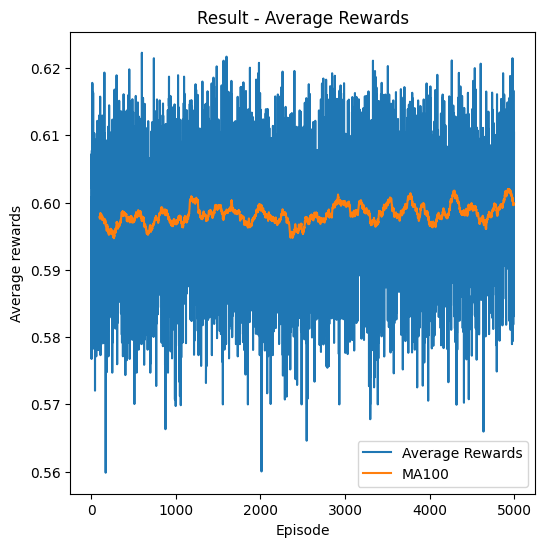

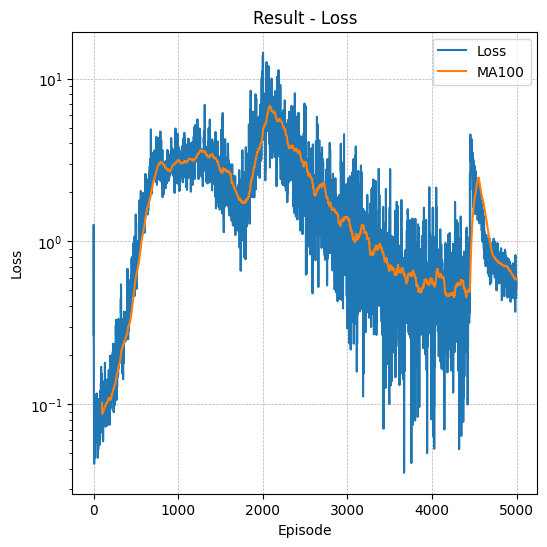

<Figure size 640x480 with 0 Axes>

In [21]:
print(len(episode_avg_rewards))
print(steps_done)
plot_metrics(show_result=True, save_format='svg', filename_prefix='10_closest_damaged_facilities_3_crew_double_budget')

In [ ]:
import torch
import numpy as np
import json
import os
import pickle
from itertools import count
import matplotlib.pyplot as plt
import glob

# Define the folder where you want to save your models and metrics
save_folder = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/Training_2"

# Create the folder if it doesn't exist
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

def get_latest_episode():
    # Check for the existence of the checkpoint file
    checkpoint_path = os.path.join(save_folder, "dqn_policy_model_checkpoint.pth")
    if os.path.exists(checkpoint_path):
        # Load the metrics file to get the last episode number
        metrics_path = os.path.join(save_folder, "metrics_checkpoint.json")
        with open(metrics_path, 'r') as f:
            metrics = json.load(f)
            return len(metrics['episode_avg_rewards'])
    return 0

def save_progress(episode):
    # Define base filenames without episode numbers
    policy_model_save_path = os.path.join(save_folder, "dqn_policy_model_checkpoint.pth")
    target_model_save_path = os.path.join(save_folder, "dqn_target_model_checkpoint.pth")
    metrics_save_path = os.path.join(save_folder, "metrics_checkpoint.json")
    steps_done_save_path = os.path.join(save_folder, "steps_done_checkpoint.json")
    replay_memory_save_path = os.path.join(save_folder, "replay_memory_checkpoint.pkl")
    optimizer_save_path = os.path.join(save_folder, "optimizer_checkpoint.pth")

    # Save the policy network
    torch.save(policy_net.state_dict(), policy_model_save_path)

    # Save the target network
    torch.save(target_net.state_dict(), target_model_save_path)

    # Save metrics
    with open(metrics_save_path, 'w') as f:
        json.dump({
            'episode_avg_rewards': episode_avg_rewards,
            'episode_losses': episode_losses
        }, f)

    # Save steps_done
    with open(steps_done_save_path, 'w') as f:
        json.dump({
            'steps_done': steps_done
        }, f)

    # Save replay memory
    with open(replay_memory_save_path, 'wb') as f:
        pickle.dump(memory, f)

    # Save optimizer state
    torch.save(optimizer.state_dict(), optimizer_save_path)

    print(f"Checkpoint updated at episode {episode}")

def load_progress():
    # Load from checkpoint files without episode numbers
    policy_model_load_path = os.path.join(save_folder, "dqn_policy_model_checkpoint.pth")
    target_model_load_path = os.path.join(save_folder, "dqn_target_model_checkpoint.pth")
    metrics_load_path = os.path.join(save_folder, "metrics_checkpoint.json")
    steps_done_load_path = os.path.join(save_folder, "steps_done_checkpoint.json")
    replay_memory_load_path = os.path.join(save_folder, "replay_memory_checkpoint.pkl")
    optimizer_load_path = os.path.join(save_folder, "optimizer_checkpoint.pth")

    try:
      # Load policy network
      policy_net.load_state_dict(torch.load(policy_model_load_path))

      # Load target network
      target_net.load_state_dict(torch.load(target_model_load_path))
    except:
      # Load policy network
      # Explicitly map the model to the CPU when loading
      policy_net.load_state_dict(torch.load(policy_model_load_path, map_location=torch.device('cpu')))

      # Load target network
      # Explicitly map the model to the CPU when loading
      target_net.load_state_dict(torch.load(target_model_load_path, map_location=torch.device('cpu')))


    # Load metrics
    with open(metrics_load_path, 'r') as f:
        metrics = json.load(f)
        global episode_avg_rewards, episode_losses
        episode_avg_rewards = metrics['episode_avg_rewards']
        episode_losses = metrics['episode_losses']

    # Load steps_done
    with open(steps_done_load_path, 'r') as f:
        steps_done_data = json.load(f)
        global steps_done
        steps_done = steps_done_data['steps_done']

    # Load replay memory
    with open(replay_memory_load_path, 'rb') as f:
        global memory
        memory = pickle.load(f)

    # Load optimizer state
    optimizer.load_state_dict(torch.load(optimizer_load_path))

    print(f"Checkpoint loaded")

# Check if there's a saved state to resume from
start_episode = get_latest_episode()
if start_episode > 0:
    load_progress()
    start_episode += 1  # Start from the next episode
else:
    start_episode = 0
    # Initialize your variables here (episode_avg_rewards, episode_losses, steps_done, memory)
    episode_avg_rewards = []
    episode_losses = []
    steps_done = 0
    memory = ReplayMemory(10000)  # Assuming you have a ReplayMemory class defined

additional_episode = 5000 #Should be 5000 for learning agents
end_episode = start_episode + additional_episode

# Initialize optimizer with initial learning rate
initial_LR = 0.000001  # Set your initial learning rate
optimizer = torch.optim.AdamW(policy_net.parameters(), lr=initial_LR)

def print_progress(episode, avg_reward, loss, actions_taken):
    print(f"Episode: {episode}")
    print(f"Average Reward: {avg_reward:.4f}")
    if loss is not None:
        print(f"Loss: {loss:.4f}")
    print("Actions Taken:")
    for action, count in actions_taken.items():
        print(f"  Action {action}: {count}")
    print("-" * 40)

for i_episode in range(start_episode, end_episode):
    # Initialize the environment and get its state
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    rewards_in_episode = []
    losses_in_episode = []
    actions_taken = {}

    for t in count():
        action_mask = env.generate_mask()
        action_mask = torch.tensor(action_mask, dtype=torch.float32, device=device)
        action = select_action(state, action_mask)

        # Count actions taken
        action_item = action.item()
        actions_taken[action_item] = actions_taken.get(action_item, 0) + 1

        observation, reward, terminated, truncated, _ = env.step(action_item)
        rewards_in_episode.append(reward)
        reward = torch.tensor([reward], device=device)
        done = env.check_done()

        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        state = next_state

        # Perform one step of the optimization (on the policy network)
        loss = optimize_model()
        if loss is not None:
            losses_in_episode.append(loss)

        # Soft update of the target network's weights
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            episode_durations.append(t+1)
            episode_avg_reward = np.mean(rewards_in_episode)
            episode_avg_rewards.append(episode_avg_reward)
            episode_loss = np.mean(losses_in_episode) if losses_in_episode else None
            if episode_loss is not None:
                episode_losses.append(episode_loss)

            # Print progress
            print_progress(i_episode, episode_avg_reward, episode_loss, actions_taken)

            break

    # Save progress every 50 episodes
    if (i_episode + 1) % 50 == 0:
        save_progress(i_episode + 1)
        print(f"Checkpoint updated at episode {i_episode + 1}")

env.print_final_action_counts()

# Final save after all episodes
save_progress(end_episode)
print(f"Training completed. Final checkpoint saved i.e. episode {end_episode}")

# Plot metrics
plot_metrics(show_result=True, save_format='svg', filename_prefix='10_closest_damaged_facilities_3_crews_58_budget_3')

plt.show()

In [ ]:
import os
import torch

# Define paths for saving the models and other data
checkpoint_path = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/checkpoints/checkpoint_2/dqn_checkpoint.pth"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

torch.save({
    'episode': i_episode,
    'policy_net_state_dict': policy_net.state_dict(),
    'target_net_state_dict': target_net.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'steps_done': steps_done,
    'episode_avg_rewards': episode_avg_rewards,
    'episode_losses': episode_losses,
    'memory': memory  # Save the replay memory
}, checkpoint_path)

print(f"Checkpoint saved at episode: {i_episode + 1}")

Checkpoint saved at episode: 1272


In [ ]:
# # code to load a second main checkpoint.
# Define paths for saving the models and other data
checkpoint_path = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/checkpoints/checkpoint_2/dqn_checkpoint.pth"

# Initialize your model, optimizer, and other components
policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
optimizer = torch.optim.Adam(policy_net.parameters())

# Load the checkpoint
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
target_net.load_state_dict(checkpoint['target_net_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
steps_done = checkpoint['steps_done']
episode_avg_rewards = checkpoint['episode_avg_rewards']
episode_losses = checkpoint['episode_losses']
memory = checkpoint['memory']
start_episode = checkpoint['episode'] + 1  # Start from the next episode

print(f"Resuming training from episode: {start_episode}")


<ipython-input-31-d244ea5c47a3>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))


Resuming training from episode: 1272


Streaming output truncated to the last 5000 lines.
<ipython-input-10-c6580da6d54c>:240: UserWarning: Agent 2615 is being placed with
place_agent() despite already having the position (-2.083853147179787, -0.6714862179089249). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(agent, (x, y))
<ipython-input-10-c6580da6d54c>:240: UserWarning: Agent 2616 is being placed with
place_agent() despite already having the position (-1.260010224700558, -1.995144612251835). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(agent, (x, y))
<ipython-input-10-c6580da6d54c>:240: UserWarning: Agent 2617 is being placed with
place_agent() despite already having the position (1.952562061106264, -1.517984206841912). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agen

Step: 0, Action: 116, Reward: 0.524507085661999 Terminated: False
Step: 1, Action: 104, Reward: 0.5666423320470606 Terminated: False
Step: 2, Action: 104, Reward: 0.6086687473219647 Terminated: False
Step: 3, Action: 103, Reward: 0.6234485215629328 Terminated: False
Step: 4, Action: 93, Reward: 0.6346388341948288 Terminated: False
Step: 5, Action: 21, Reward: 0.6399944236508119 Terminated: False
Step: 6, Action: 21, Reward: 0.6452839084923877 Terminated: True
Termination condition met.


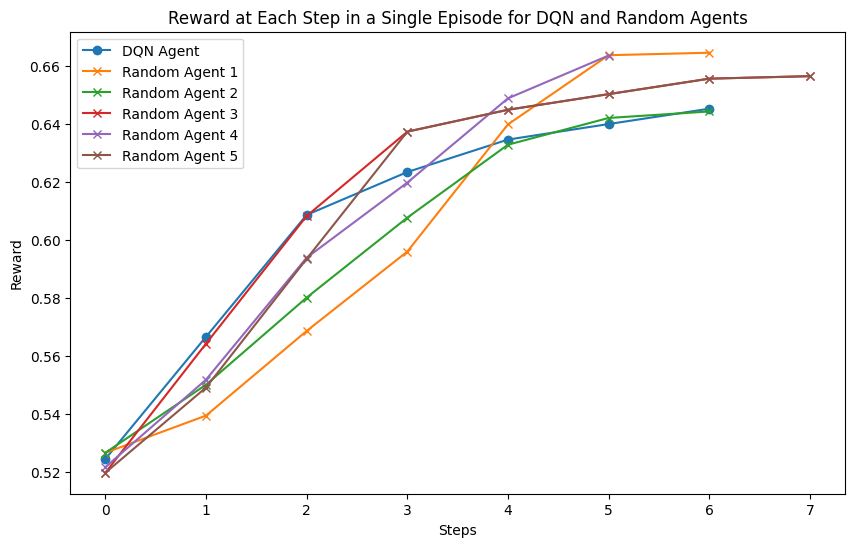

In [22]:
'''My code'''
import matplotlib.pyplot as plt
import torch
from itertools import count

# Constants
MIN_Q_VALUE_OFFSET = 10
NUM_RANDOM_AGENTS = 5

# Initialize variables to keep track of rewards and steps for DQN agent
dqn_rewards = []
dqn_steps = []
dqn_damaged_functionalities = []

# Initialize variables to keep track of rewards for random agents
random_rewards = [[] for _ in range(NUM_RANDOM_AGENTS)]

def evaluate_dqn_agent(env, policy_net, device):
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

    for t in count():
        with torch.no_grad():
            action_mask = env.generate_mask()
            action_mask = torch.tensor(action_mask, dtype=torch.float32, device=device)
            q_values = policy_net(state)
            min_q_value = torch.min(q_values)
            masked_q_values = q_values.clone()
            action_mask_reshaped = action_mask.unsqueeze(0)
            masked_q_values[action_mask_reshaped == 0] = min_q_value - MIN_Q_VALUE_OFFSET
            action = masked_q_values.max(1)[1].view(1, 1)

        observation, reward, terminated, truncated, _ = env.step(action.item())
        dqn_rewards.append(reward)
        dqn_steps.append(t)

        print(f"Step: {t}, Action: {action.item()}, Reward: {reward} Terminated: {terminated}")

        if terminated:
            print("Termination condition met.")
            break
        else:
            state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

def evaluate_random_agents(env, device):
    for i in range(NUM_RANDOM_AGENTS):
        # Modification: unpack into a single variable and discard the rest if there are more
        reset_result = env.reset()
        state = reset_result[0] if isinstance(reset_result, tuple) else reset_result

        # If you expect and need specific values, adjust accordingly
        # Example: state, info = env.reset() # If env.reset() returns state and info

        for t in count():
            action_mask = env.generate_mask()
            action_mask = torch.tensor(action_mask, dtype=torch.float32, device=device)
            valid_actions = torch.nonzero(action_mask, as_tuple=False).squeeze()
            if valid_actions.dim() == 0:
                valid_actions = valid_actions.unsqueeze(0)
            random_action = valid_actions[torch.randint(0, len(valid_actions), (1,))]
            action = torch.tensor([[random_action]], device=device, dtype=torch.long)
            observation, reward, terminated, truncated, _ = env.step(action)
            random_rewards[i].append(reward)

            if terminated:
                break

# Assuming env, policy_net, and device are defined elsewhere
evaluate_dqn_agent(env, policy_net, device)
evaluate_random_agents(env, device)

# Plotting the rewards
plt.figure(figsize=(10, 6))

# Plot for DQN agent
plt.plot(dqn_steps, dqn_rewards, marker='o', label='DQN Agent')

# Plot for random agents
for i in range(NUM_RANDOM_AGENTS):
    plt.plot(range(len(random_rewards[i])), random_rewards[i], marker='x', label=f'Random Agent {i+1}')

plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward at Each Step in a Single Episode for DQN and Random Agents')
plt.legend()
plt.savefig('DQN_vs_Random_22_steps.svg', format='svg', bbox_inches='tight')
plt.show()


In [ ]:
'''My code'''
import matplotlib.pyplot as plt
import torch
import os
import pickle
from itertools import count

# Constants
NUM_RANDOM_AGENTS = 1000
MIN_Q_VALUE_OFFSET = 10
SAVE_FOLDER = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/Rewards"

# Initialize variables to keep track of rewards and steps for DQN agent
dqn_rewards = []
dqn_steps = []
dqn_damaged_functionalities = []

# Initialize variables to keep track of rewards for random agents
random_rewards = [[] for _ in range(NUM_RANDOM_AGENTS)]

def evaluate_dqn_agent(env, policy_net, device):
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

    for t in count():
        with torch.no_grad():
            action_mask = env.generate_mask()
            action_mask = torch.tensor(action_mask, dtype=torch.float32, device=device)
            q_values = policy_net(state)
            min_q_value = torch.min(q_values)
            masked_q_values = q_values.clone()
            action_mask_reshaped = action_mask.unsqueeze(0)
            masked_q_values[action_mask_reshaped == 0] = min_q_value - MIN_Q_VALUE_OFFSET
            action = masked_q_values.max(1)[1].view(1, 1)

        observation, reward, terminated, truncated, _ = env.step(action.item())
        dqn_rewards.append(reward)
        dqn_steps.append(t)

        print(f"Step: {t}, Action: {action.item()}, Reward: {reward} Terminated: {terminated}")

        if terminated:
            print("Termination condition met.")
            break
        else:
            state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

def evaluate_random_agents(env, device):
    for i in range(NUM_RANDOM_AGENTS):
        state = env.reset()
        for t in count():
            action_mask = env.generate_mask()
            action_mask = torch.tensor(action_mask, dtype=torch.float32, device=device)
            valid_actions = torch.nonzero(action_mask, as_tuple=False).squeeze()
            if valid_actions.dim() == 0:
                valid_actions = valid_actions.unsqueeze(0)
            random_action = valid_actions[torch.randint(0, len(valid_actions), (1,))]
            action = torch.tensor([[random_action]], device=device, dtype=torch.long)
            observation, reward, terminated, truncated, _ = env.step(action)
            random_rewards[i].append(reward)

            if terminated:
                break

def save_rewards(dqn_rewards, random_rewards, save_folder):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    dqn_rewards_save_path = os.path.join(save_folder, "dqn_rewards.pkl")
    random_rewards_save_path = os.path.join(save_folder, "random_rewards.pkl")

    with open(dqn_rewards_save_path, 'wb') as f:
        pickle.dump(dqn_rewards, f)
        print(f"DQN rewards saved successfully at {dqn_rewards_save_path}")

    with open(random_rewards_save_path, 'wb') as f:
        pickle.dump(random_rewards, f)
        print(f"Random rewards saved successfully at {random_rewards_save_path}")

# Assuming env, policy_net, and device are defined elsewhere
evaluate_dqn_agent(env, policy_net, device)
evaluate_random_agents(env, device)

# Check the data before saving
print(f"Length of DQN Rewards: {len(dqn_rewards)}")
print(f"Length of Random Rewards for first agent: {len(random_rewards[0])}")

# Save rewards
save_rewards(dqn_rewards, random_rewards, SAVE_FOLDER)

NameError: name 'env' is not defined

In [ ]:
import os
import pickle

# Constants
RANDOM_REWARDS_SAVE_PATH = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/Rewards/random_rewards.pkl"

DQN_REWARDS_SAVE_PATH = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/Rewards/dqn_rewards.pkl"

# Function to load rewards from a file

def load_rewards(file_path):
    if os.path.exists(file_path):
        try:
            with open(file_path, 'rb') as f:
                rewards = pickle.load(f)
            print(f"Rewards loaded successfully from {file_path}.")
            return rewards
        except Exception as e:
            print(f"Error loading rewards from {file_path}: {e}")
    else:
        print(f"Rewards file not found at {file_path}.")
    return None

# Load Random rewards
random_rewards = load_rewards(RANDOM_REWARDS_SAVE_PATH)

# Load DQN rewards
dqn_rewards = load_rewards(DQN_REWARDS_SAVE_PATH)

# Check the loaded data
if random_rewards is not None:
    print(f"Length of Random Rewards for first agent: {len(random_rewards[0])}")

if dqn_rewards is not None:
    print(f"Length of DQN Rewards: {len(dqn_rewards)}")



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dqn_rewards and random_rewards are loaded as in the previous code

if dqn_rewards is not None and random_rewards is not None:
    # Find the best random agent (agent with the highest cumulative reward)
    best_random_agent_index = np.argmax([sum(rewards) for rewards in random_rewards])
    best_random_agent_rewards = random_rewards[best_random_agent_index]

    # Plotting

    # Plot 1: Best Random Agent
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(best_random_agent_rewards)), best_random_agent_rewards, marker='o', linestyle='-', color='skyblue', label='Best Random Agent')
    plt.axhline(y=np.mean(best_random_agent_rewards), color='blue', linestyle='--', label=f'Mean Reward: {np.mean(best_random_agent_rewards):.2f}')
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.title('Rewards for Best Random Agent (22 Steps)')
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1)) # Legend top left
    plt.text(0.95, 0.05, f'Total steps: {len(best_random_agent_rewards)}', ha='right', va='bottom', transform=plt.gca().transAxes) #Info on bottom right
    plt.show()


    # Plot 2: DQN Agent
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(dqn_rewards)), dqn_rewards, marker='s', linestyle='-', color='lightcoral', label='DQN Agent')
    plt.axhline(y=np.mean(dqn_rewards), color='red', linestyle='--', label=f'Mean Reward: {np.mean(dqn_rewards):.2f}')
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.title('Rewards for DQN Agent (22 Steps)')
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1)) #Legend on top left
    plt.text(0.95, 0.05, f'Total steps: {len(dqn_rewards)}', ha='right', va='bottom', transform=plt.gca().transAxes) #Info on bottom right
    plt.show()

    print(f"DQN mean reward: {np.mean(dqn_rewards)}")
    print(f"Best Random agent mean reward: {np.mean(best_random_agent_rewards)}")
else:
  print("DQN or random rewards data not available. Please ensure they are loaded correctly.")

In [ ]:
# prompt: Write code to generate a single plot fotr the functionality of the DQN and the best random agents with the mean indicated.

import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

# Constants
RANDOM_REWARDS_SAVE_PATH = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/Rewards/random_rewards.pkl"
DQN_REWARDS_SAVE_PATH = "/content/drive/MyDrive/Trevor's_Research_results_Notes_and_Research_log/3. My_Models/Trained_Models/PC89-S6d-LargeMap-FullTraining-UnlimitedFunds/Rewards/dqn_rewards.pkl"

def load_rewards(file_path):
    if os.path.exists(file_path):
        try:
            with open(file_path, 'rb') as f:
                rewards = pickle.load(f)
            print(f"Rewards loaded successfully from {file_path}.")
            return rewards
        except Exception as e:
            print(f"Error loading rewards from {file_path}: {e}")
    else:
        print(f"Rewards file not found at {file_path}.")
    return None

# Load Random rewards
random_rewards = load_rewards(RANDOM_REWARDS_SAVE_PATH)

# Load DQN rewards
dqn_rewards = load_rewards(DQN_REWARDS_SAVE_PATH)

if dqn_rewards is not None and random_rewards is not None:
    # Find the best random agent
    best_random_agent_index = np.argmax([sum(rewards) for rewards in random_rewards])
    best_random_agent_rewards = random_rewards[best_random_agent_index]

    plt.figure(figsize=(10, 6))

    # Plot DQN agent
    plt.plot(range(len(dqn_rewards)), dqn_rewards, marker='o', linestyle='-', label='DQN Agent')
    plt.axhline(y=np.mean(dqn_rewards), color='blue', linestyle='--', label=f'DQN Mean: {np.mean(dqn_rewards):.2f}')

    # Plot best random agent
    plt.plot(range(len(best_random_agent_rewards)), best_random_agent_rewards, marker='x', linestyle='-', label='Best Random Agent')
    plt.axhline(y=np.mean(best_random_agent_rewards), color='red', linestyle='--', label=f'Random Mean: {np.mean(best_random_agent_rewards):.2f}')


    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.title('DQN vs. Best Random Agent Rewards (22 Steps)')
    plt.legend()
    plt.grid(True)  # Add grid for better readability
    plt.show()

else:
    print("DQN or random rewards data not available. Please ensure they are loaded correctly.")

In [ ]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import torch
from itertools import count

# Constants
MAX_ALLOWED_STEPS = 22
MAX_PLOT_STEPS = 22
MIN_Q_VALUE_OFFSET = 10

# Initialize variables to keep track of rewards and steps for DQN agent
dqn_rewards = []
dqn_steps = []
dqn_damaged_functionalities = []

# Initialize variables to keep track of rewards for strategic agents
strategic_rewards = [[] for _ in range(7)]

def evaluate_dqn_agent(env, policy_net, device):
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    dqn_budget = 0

    for t in count():
        with torch.no_grad():
            action_mask = env.generate_mask()
            action_mask = torch.tensor(action_mask, dtype=torch.float32, device=device)
            q_values = policy_net(state)
            min_q_value = torch.min(q_values)
            masked_q_values = q_values.clone()
            action_mask_reshaped = action_mask.unsqueeze(0)
            masked_q_values[action_mask_reshaped == 0] = min_q_value - MIN_Q_VALUE_OFFSET
            action = masked_q_values.max(1)[1].view(1, 1)

        observation, reward, terminated, truncated, info = env.step(action.item())
        dqn_budget += info.get('step_cost', 0)
        dqn_rewards.append(reward)
        dqn_steps.append(t)

        if terminated:
            break
        else:
            state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

    return dqn_budget

def evaluate_strategic_agents(env, action_sequences, device):
    num_episodes = len(action_sequences)
    strategic_rewards = [[] for _ in range(num_episodes)]
    strategic_budgets = []

    for i in range(num_episodes):
        state = env.reset()
        current_sequence = action_sequences[i]
        strategic_budget = 0

        for step, action_index in enumerate(current_sequence):
            action = torch.tensor([[action_index]], device=device, dtype=torch.long)
            observation, reward, terminated, truncated, info = env.step(action.item())
            strategic_budget += info.get('step_cost', 0)
            strategic_rewards[i].append(reward)

            if terminated:
                break
            else:
                state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        strategic_budgets.append(strategic_budget)

    return strategic_rewards, strategic_budgets

def plot_results(dqn_rewards, dqn_budget, strategic_rewards, strategic_budgets, max_allowed_steps, max_plot_steps):
    plt.figure(figsize=(10, 6), constrained_layout=True)

    strategy_labels = [
        "Lowest to Highest all infra",
        "Lowest to Highest same infra",
        "one infra at a time",
        "Highest to lowest",
        "Random strategic agent 1",
        "Random strategic agent 2",
    ]

    colors = ['black', 'green', 'red', 'cyan', 'magenta', 'orange', 'black']
    markers = ['o', '^', 's', '*', 'x', 'D', 'p']
    vertical_offsets = [-10, -20, -20, -40, -50, -60]

    for i, rewards in enumerate(strategic_rewards):
        if not rewards:
            print(f"Skipping empty rewards for strategic agent {i}")
            continue

        max_reward_index = np.argmax(rewards)
        truncated_rewards = rewards[:max_reward_index + 1]
        steps = list(range(1, min(len(truncated_rewards), max_plot_steps) + 1))
        max_reward = max(rewards[:max_plot_steps])
        max_step = rewards.index(max_reward) + 1
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        normalized_auc = np.sum(rewards[:max_allowed_steps]) / len(rewards[:max_allowed_steps])
        label_with_steps_auc = f"{strategy_labels[i]} (Budget: {strategic_budgets[i]:.2f}, Steps: {len(rewards)}, Mean functionality: {normalized_auc:.5f}, Final functionality: {max_reward:.5f})"
        plt.plot(steps, truncated_rewards, marker=marker, color=color, linewidth=0.5, alpha=0.5, label=label_with_steps_auc)

    if len(dqn_rewards) > 0:
        steps = list(range(1, min(len(dqn_rewards), max_plot_steps) + 1))
        max_reward_dqn = max(dqn_rewards[:max_plot_steps])
        max_step_dqn = dqn_rewards.index(max_reward_dqn) + 1
        normalized_auc_dqn = np.sum(dqn_rewards[:max_plot_steps]) / len(dqn_rewards[:max_plot_steps])
        dqn_label_with_steps_auc = f"DQN Agent (Budget: {dqn_budget:.2f}, Steps: {len(dqn_rewards)}, Mean functionality: {normalized_auc_dqn:.5f}, Final functionality: {max_reward_dqn:.5f})"
        plt.plot(steps, dqn_rewards[:max_plot_steps], color='blue', linewidth=2, marker='o', markersize=8, label=dqn_label_with_steps_auc)

    plt.xlabel('Steps', fontsize=18)
    plt.ylabel('Functionality', fontsize=18)
    plt.xticks(range(1, max_plot_steps + 1, 1), fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(loc='lower center', bbox_to_anchor=(0.48, -0.55), ncol=1, fancybox=True, fontsize=10)
    plt.savefig('DQN_vs_Strategic_Steps_Budget_NormAUC_Adjusted.svg', format='svg', bbox_inches='tight')
    plt.show()

# Define a list of action sequences, one for each episode
action_sequences = [
    [1, 1, 1, 1, 1, 1, 107, 107, 107, 107, 107, 107, 75, 75, 75, 75, 75, 114, 114, 114, 114],
    [27, 27, 27, 27, 27, 27, 59, 59, 59, 59, 59, 41, 69, 69, 69, 69, 85, 85, 85, 85, 85, 85],
    [4, 4, 4, 4, 4, 2, 67, 67, 64, 64, 64, 103, 103, 99, 115, 113, 113, 113, 107],
    [0, 0, 0, 0, 0, 2, 94, 94, 86, 86, 86, 103, 103, 99, 115, 113, 113, 113, 107],
    [37, 37, 37, 37, 37, 2, 94, 94, 17, 17, 17, 29, 29, 99, 115, 113, 113, 113, 107],
    [37, 37, 37, 37, 37, 2, 27, 27, 27, 27, 27, 91, 96, 96, 96, 96, 95, 95, 95, 95, 95, 95],
]

# Assuming env, policy_net, and device are defined elsewhere
dqn_budget = evaluate_dqn_agent(env, policy_net, device)
strategic_rewards, strategic_budgets = evaluate_strategic_agents(env, action_sequences, device)

plot_results(dqn_rewards, dqn_budget, strategic_rewards, strategic_budgets, MAX_ALLOWED_STEPS, MAX_PLOT_STEPS)
